### In Progress

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium # map rendering library
from functools import reduce
import scipy

print('Libraries imported.')

Libraries imported.


In [2]:
df1=pd.read_csv('Evictions.csv')

In [3]:
df1.head()

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,62712/18,19077,80-15 41ST AVENUE,215,09/20/2018,Edward,Guida,Residential,QUEENS,11373
1,54221/17,332335,31 EAST 31ST STREET,GROUND,09/19/2017,Thomas,Bia,Commercial,MANHATTAN,10016
2,B42362/19,117551,1605 METROPOLITAN AVENUE,9H,02/26/2020,Darlene,Barone,Residential,BRONX,10462
3,K85736/19,102339,1236 UNION STREET,3D,02/26/2020,Ileana,Rivera,Residential,BROOKLYN,11225
4,24576/17,2778,1085 NELSON AVE,1A,12/13/2017,Vadim,Barbarovich,Residential,BRONX,10452


Let's see the date range for the data.

In [4]:
df1['EXECUTED_DATE'].min()

'01/02/2018'

In [5]:
df1['EXECUTED_DATE'].max()

'12/31/2019'

This appears to be two years worth of data.

In [6]:
df1.head()

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,62712/18,19077,80-15 41ST AVENUE,215,09/20/2018,Edward,Guida,Residential,QUEENS,11373
1,54221/17,332335,31 EAST 31ST STREET,GROUND,09/19/2017,Thomas,Bia,Commercial,MANHATTAN,10016
2,B42362/19,117551,1605 METROPOLITAN AVENUE,9H,02/26/2020,Darlene,Barone,Residential,BRONX,10462
3,K85736/19,102339,1236 UNION STREET,3D,02/26/2020,Ileana,Rivera,Residential,BROOKLYN,11225
4,24576/17,2778,1085 NELSON AVE,1A,12/13/2017,Vadim,Barbarovich,Residential,BRONX,10452


In [7]:
df1['BOROUGH'].value_counts()

BRONX            22034
BROOKLYN         18800
QUEENS           13162
MANHATTAN        10159
STATEN ISLAND     2168
Name: BOROUGH, dtype: int64

In [8]:
df_zipcode=df1[['EVICTION_ZIP']]
df_zipcode.head()

,EVICTION_ZIP
0,11373
1,10016
2,10462
3,11225
4,10452


In [9]:
df_zipcode=pd.DataFrame(df_zipcode['EVICTION_ZIP'].value_counts())

In [10]:
df_zipcode.reset_index(inplace=True)
df_zipcode.rename(columns={'index':'Zip_Code','EVICTION_ZIP':'Counts'},inplace=True)
df_zipcode

,Zip_Code,Counts
0,10467,1835
1,10458,1799
2,10456,1742
3,10453,1667
4,10457,1462
...,...,...
218,11753,1
219,10152,1
220,11240,1
221,11024,1


In [11]:
df_zipcode.columns.values

array(['Zip_Code', 'Counts'], dtype=object)

In [12]:
df_zipcode

,Zip_Code,Counts
0,10467,1835
1,10458,1799
2,10456,1742
3,10453,1667
4,10457,1462
...,...,...
218,11753,1
219,10152,1
220,11240,1
221,11024,1


In [13]:
df_zipcode=df_zipcode[df_zipcode['Zip_Code']>9999]
df_zipcode['Latitude']=''
df_zipcode['Longitude']=''
df_zipcode.head()

/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Zip_Code,Counts,Latitude,Longitude
0,10467,1835,,
1,10458,1799,,
2,10456,1742,,
3,10453,1667,,
4,10457,1462,,


In [14]:
df_zipcode.shape

(221, 4)

Let's create a dataframe with zip code is NY state

In [15]:
us_zipcodes=pd.read_csv('us-zip-code-latitude-and-longitude.csv',sep=';')

In [16]:
us_zipcodes.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,71937,Cove,AR,34.398483,-94.39398,-6,1,"34.398483,-94.39398"
1,72044,Edgemont,AR,35.624351,-92.16056,-6,1,"35.624351,-92.16056"
2,56171,Sherburn,MN,43.660847,-94.74357,-6,1,"43.660847,-94.74357"
3,49430,Lamont,MI,43.010337,-85.89754,-5,1,"43.010337,-85.89754"
4,52585,Richland,IA,41.194129,-91.98027,-6,1,"41.194129,-91.98027"


In [17]:
ny_state_zip=us_zipcodes[us_zipcodes['State']=='NY']

In [18]:
ny_state_zip.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
21,14043,Depew,NY,42.904958,-78.700600,-5,1,"42.904958,-78.7006"
72,13827,Owego,NY,42.120274,-76.258740,-5,1,"42.120274,-76.25874"
73,14739,Friendship,NY,42.192384,-78.143080,-5,1,"42.192384,-78.14308"
85,11703,North Babylon,NY,40.733398,-73.322570,-5,1,"40.733398,-73.32257"
131,11707,West Babylon,NY,40.922326,-72.637078,-5,1,"40.922326,-72.637078"


In [19]:
ny_state_zip.columns.values

array(['Zip', 'City', 'State', 'Latitude', 'Longitude', 'Timezone',
       'Daylight savings time flag', 'geopoint'], dtype=object)

In [20]:
ny_state_zip.rename(columns={'Zip':'Zip_Code'},inplace=True)
ny_state_zip

/home/user-1131/venv/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Zip_Code,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
21,14043,Depew,NY,42.904958,-78.700600,-5,1,"42.904958,-78.7006"
72,13827,Owego,NY,42.120274,-76.258740,-5,1,"42.120274,-76.25874"
73,14739,Friendship,NY,42.192384,-78.143080,-5,1,"42.192384,-78.14308"
85,11703,North Babylon,NY,40.733398,-73.322570,-5,1,"40.733398,-73.32257"
131,11707,West Babylon,NY,40.922326,-72.637078,-5,1,"40.922326,-72.637078"
...,...,...,...,...,...,...,...,...
43033,11507,Albertson,NY,40.769942,-73.650040,-5,1,"40.769942,-73.65004"
43139,12979,Rouses Point,NY,44.990606,-73.370170,-5,1,"44.990606,-73.37017"
43140,13452,Saint Johnsville,NY,43.021223,-74.645370,-5,1,"43.021223,-74.64537"
43154,10211,New York,NY,40.780751,-73.977182,-5,1,"40.780751,-73.977182"


The next step is to put together df_zipcode with ny_state_zip based on zip code.

In [21]:
df_combined=pd.merge(df_zipcode,ny_state_zip,on='Zip_Code',how='left')

In [22]:
df_combined.drop('Latitude_x',axis=1,inplace=True)

In [23]:
df_combined.drop('Longitude_x',axis=1,inplace=True)

In [24]:
df_combined.dropna(inplace=True)
df_combined

,Zip_Code,Counts,City,State,Latitude_y,Longitude_y,Timezone,Daylight savings time flag,geopoint
0,10467,1835,Bronx,NY,40.872265,-73.869370,-5.0,1.0,"40.872265,-73.86937"
1,10458,1799,Bronx,NY,40.864166,-73.888810,-5.0,1.0,"40.864166,-73.88881"
2,10456,1742,Bronx,NY,40.829676,-73.908560,-5.0,1.0,"40.829676,-73.90856"
3,10453,1667,Bronx,NY,40.853017,-73.912140,-5.0,1.0,"40.853017,-73.91214"
4,10457,1462,Bronx,NY,40.846745,-73.898610,-5.0,1.0,"40.846745,-73.89861"
...,...,...,...,...,...,...,...,...,...
216,11753,1,Jericho,NY,40.786544,-73.536750,-5.0,1.0,"40.786544,-73.53675"
217,10152,1,New York,NY,40.758611,-73.972230,-5.0,1.0,"40.758611,-73.97223"
218,11240,1,Brooklyn,NY,40.645099,-73.945032,-5.0,1.0,"40.645099,-73.945032"
219,11024,1,Great Neck,NY,40.812887,-73.740940,-5.0,1.0,"40.812887,-73.74094"


In [25]:
df_combined.rename(columns={'Latitude_y':'Latitude','Longitude_y':'Longitude'},inplace=True)

Let's save a copy of df_combined, just in case.

In [26]:
df_combined.to_csv('combined_table.csv',index=0)

In [27]:
df_combined=pd.read_csv('combined_table.csv')
df_combined

,Zip_Code,Counts,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,10467,1835,Bronx,NY,40.872265,-73.869370,-5.0,1.0,"40.872265,-73.86937"
1,10458,1799,Bronx,NY,40.864166,-73.888810,-5.0,1.0,"40.864166,-73.88881"
2,10456,1742,Bronx,NY,40.829676,-73.908560,-5.0,1.0,"40.829676,-73.90856"
3,10453,1667,Bronx,NY,40.853017,-73.912140,-5.0,1.0,"40.853017,-73.91214"
4,10457,1462,Bronx,NY,40.846745,-73.898610,-5.0,1.0,"40.846745,-73.89861"
...,...,...,...,...,...,...,...,...,...
198,11753,1,Jericho,NY,40.786544,-73.536750,-5.0,1.0,"40.786544,-73.53675"
199,10152,1,New York,NY,40.758611,-73.972230,-5.0,1.0,"40.758611,-73.97223"
200,11240,1,Brooklyn,NY,40.645099,-73.945032,-5.0,1.0,"40.645099,-73.945032"
201,11024,1,Great Neck,NY,40.812887,-73.740940,-5.0,1.0,"40.812887,-73.74094"


In [28]:
df_combined.dtypes

Zip_Code                        int64
Counts                          int64
City                           object
State                          object
Latitude                      float64
Longitude                     float64
Timezone                      float64
Daylight savings time flag    float64
geopoint                       object
dtype: object

In [29]:
df_combined.shape

(203, 9)

In [30]:
city='New York City, New York, United States of America'
geolocator=Nominatim(user_agent="nyc_explorer")
location=geolocator.geocode(city)
lat=location.latitude
lon=location.longitude
lat,lon

(40.7127281, -74.0060152)

In [31]:
NYC_map=folium.Map(location=[lat-0.1,lon],zoom_start=10)        #0.1 is the offset to center the map.
NYC_map

We'll mark the latitude and longitude of each zip code and include eviction counts in the label.

In [32]:
for lat, lon, zipcode,city,counts in zip(df_combined['Latitude'], df_combined['Longitude'], df_combined['Zip_Code'],df_combined['City'],df_combined['Counts']):
    label = 'City: {}, Zipcode: {}, Counts: {}'.format(city,zipcode,counts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=4,
    popup=label,
    color='orange',
    line_width=1,
    fill=True,
    fill_color='red',
    fill_opacity=0.5,
    parse_html=False).add_to(NYC_map)  
    
NYC_map

We cluster the markers to make the map more legible. Hovering mouse over the clusters show the number of markers in it. When we zoom in to individual markers. Hovering over individual markers show the number of evictions.

In [33]:
#Group markers into different clusters

from folium import plugins #import plugins

latitude=location.latitude
longitude=location.longitude

# let's start again with a clean copy of the map of San Francisco
NYC_map = folium.Map(location = [latitude, longitude], zoom_start = 9)

# instantiate a mark cluster object for the incidents in the dataframe
evictions = plugins.MarkerCluster().add_to(NYC_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_combined.Latitude, df_combined.Longitude, df_combined.Counts):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(evictions)

# display map
NYC_map

In our next step we'll delve deeper into the residential evictions. Let's take a look at our original dataframe df1. For illustration purpose, this time we'll go over the process again, except we'll use Nominatim to extract coordinates.

In [34]:
df1.head()

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,62712/18,19077,80-15 41ST AVENUE,215,09/20/2018,Edward,Guida,Residential,QUEENS,11373
1,54221/17,332335,31 EAST 31ST STREET,GROUND,09/19/2017,Thomas,Bia,Commercial,MANHATTAN,10016
2,B42362/19,117551,1605 METROPOLITAN AVENUE,9H,02/26/2020,Darlene,Barone,Residential,BRONX,10462
3,K85736/19,102339,1236 UNION STREET,3D,02/26/2020,Ileana,Rivera,Residential,BROOKLYN,11225
4,24576/17,2778,1085 NELSON AVE,1A,12/13/2017,Vadim,Barbarovich,Residential,BRONX,10452


In [35]:
df_evictions_residential=df1[df1['RESIDENTIAL_COMMERCIAL_IND']=='Residential']
df_evictions_residential

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,62712/18,19077,80-15 41ST AVENUE,215,09/20/2018,Edward,Guida,Residential,QUEENS,11373
2,B42362/19,117551,1605 METROPOLITAN AVENUE,9H,02/26/2020,Darlene,Barone,Residential,BRONX,10462
3,K85736/19,102339,1236 UNION STREET,3D,02/26/2020,Ileana,Rivera,Residential,BROOKLYN,11225
4,24576/17,2778,1085 NELSON AVE,1A,12/13/2017,Vadim,Barbarovich,Residential,BRONX,10452
6,B55306/17,101402,1129 ST. LAWRENCE AVENUE,4D,12/19/2018,Darlene,Barone,Residential,BRONX,10472
...,...,...,...,...,...,...,...,...,...,...
66317,63498/17,78997,2333 WEBSTER AVENUE,3L,02/15/2018,Henry,Daley,Residential,BRONX,10458
66318,N77591/16,76847,408 EAST 64TH STREET,2B,05/17/2017,Ileana,Rivera,Residential,MANHATTAN,10065
66320,68649/17,73953,712 REMSEN AVENUE,NaN,09/15/2017,Henry,Daley,Residential,BROOKLYN,11236
66321,77370/18,22034,110-19 FRANCIS LEWIS BLVD.,NaN,05/28/2019,Edward,Guida,Residential,QUEENS,11429


In [36]:
df_evictions_residential.columns.values

array(['COURT_INDEX_NUMBER', 'DOCKET_NUMBER', 'EVICTION_ADDRESS',
       'EVICTION_APT_NUM', 'EXECUTED_DATE', 'MARSHAL_FIRST_NAME',
       'MARSHAL_LAST_NAME', 'RESIDENTIAL_COMMERCIAL_IND', 'BOROUGH',
       'EVICTION_ZIP'], dtype=object)

We'll drop all the columns except 'EVICTION_ADDRESS', 'EXECUTED_DATE', 'RESIDENTIAL_COMMERCIAL_IND', 'BOROUGH' and 'EVICTION_ZIP'.

In [37]:
df_evictions_residential.drop('COURT_INDEX_NUMBER',axis=1,inplace=True)
df_evictions_residential.drop('DOCKET_NUMBER',axis=1,inplace=True)
df_evictions_residential.drop('EVICTION_APT_NUM',axis=1,inplace=True)
df_evictions_residential.drop('MARSHAL_FIRST_NAME',axis=1,inplace=True)
df_evictions_residential.drop('MARSHAL_LAST_NAME',axis=1,inplace=True)

df_evictions_residential.head()

/home/user-1131/venv/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373
2,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462
3,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225
4,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452
6,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472


Next we remove all rows with NaNs.

In [38]:
df_evictions_residential.dropna(inplace=True)

/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's take a look at the number of rows and columns.

In [39]:
df_evictions_residential.shape

(60747, 5)

In [40]:
df_evictions_residential

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373
2,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462
3,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225
4,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452
6,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472
...,...,...,...,...,...
66317,2333 WEBSTER AVENUE,02/15/2018,Residential,BRONX,10458
66318,408 EAST 64TH STREET,05/17/2017,Residential,MANHATTAN,10065
66320,712 REMSEN AVENUE,09/15/2017,Residential,BROOKLYN,11236
66321,110-19 FRANCIS LEWIS BLVD.,05/28/2019,Residential,QUEENS,11429


In [41]:
df3=df_evictions_residential

To look up using Nominatim package, we need a complete address. To have that handy we add a new column named 'LOOKUP ADDRESS'.

In [42]:
df3

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373
2,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462
3,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225
4,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452
6,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472
...,...,...,...,...,...
66317,2333 WEBSTER AVENUE,02/15/2018,Residential,BRONX,10458
66318,408 EAST 64TH STREET,05/17/2017,Residential,MANHATTAN,10065
66320,712 REMSEN AVENUE,09/15/2017,Residential,BROOKLYN,11236
66321,110-19 FRANCIS LEWIS BLVD.,05/28/2019,Residential,QUEENS,11429


In [43]:
df3['FULL_ADDRESS']=''
df3

/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP,FULL_ADDRESS
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,
2,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,
3,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,
4,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,
6,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,
...,...,...,...,...,...,...
66317,2333 WEBSTER AVENUE,02/15/2018,Residential,BRONX,10458,
66318,408 EAST 64TH STREET,05/17/2017,Residential,MANHATTAN,10065,
66320,712 REMSEN AVENUE,09/15/2017,Residential,BROOKLYN,11236,
66321,110-19 FRANCIS LEWIS BLVD.,05/28/2019,Residential,QUEENS,11429,


In [44]:
pd.DataFrame.to_string(df3[['EVICTION_ZIP']])
type(df3[['EVICTION_ZIP']])

pandas.core.frame.DataFrame

In [45]:
df3.dtypes

EVICTION_ADDRESS              object
EXECUTED_DATE                 object
RESIDENTIAL_COMMERCIAL_IND    object
BOROUGH                       object
EVICTION_ZIP                   int64
FULL_ADDRESS                  object
dtype: object

In [46]:
df3=df3.replace('\*','',regex=True).astype(str)
df3['EVICTION_ADDRESS']

0                        80-15 41ST AVENUE
2                 1605 METROPOLITAN AVENUE
3                        1236 UNION STREET
4                          1085 NELSON AVE
6                 1129 ST. LAWRENCE AVENUE
                       ...                
66317                  2333 WEBSTER AVENUE
66318                 408 EAST 64TH STREET
66320                    712 REMSEN AVENUE
66321           110-19 FRANCIS LEWIS BLVD.
66322    360 MONTAUK AVE. APT. 2 2ND FLOOR
Name: EVICTION_ADDRESS, Length: 60747, dtype: object

In [47]:
df3['FULL_ADDRESS']=df3['EVICTION_ADDRESS']+', NY '+df3['EVICTION_ZIP']
df3['FULL_ADDRESS']

0                        80-15 41ST AVENUE, NY 11373
2                 1605 METROPOLITAN AVENUE, NY 10462
3                        1236 UNION STREET, NY 11225
4                          1085 NELSON AVE, NY 10452
6                 1129 ST. LAWRENCE AVENUE, NY 10472
                            ...                     
66317                  2333 WEBSTER AVENUE, NY 10458
66318                 408 EAST 64TH STREET, NY 10065
66320                    712 REMSEN AVENUE, NY 11236
66321           110-19 FRANCIS LEWIS BLVD., NY 11429
66322    360 MONTAUK AVE. APT. 2 2ND FLOOR, NY 11208
Name: FULL_ADDRESS, Length: 60747, dtype: object

In [48]:
df3.reset_index(inplace=True)
df3.drop('index',axis=1,inplace=True)

In [49]:
df3.head()

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP,FULL_ADDRESS
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,"80-15 41ST AVENUE, NY 11373"
1,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,"1605 METROPOLITAN AVENUE, NY 10462"
2,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,"1236 UNION STREET, NY 11225"
3,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,"1085 NELSON AVE, NY 10452"
4,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,"1129 ST. LAWRENCE AVENUE, NY 10472"


The list is too long to use Nominatim. Let's create new columns for city and its latitude and longitude.

In [50]:
df3['City']=''
df3['City_Latitude']=''
df3['City_Longitude']=''

In [51]:
df3.rename(columns={'EVICTION_ZIP':'Zip_Code'},inplace=True)
df3.head()

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zip_Code,FULL_ADDRESS,City,City_Latitude,City_Longitude
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,"80-15 41ST AVENUE, NY 11373",,,
1,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,"1605 METROPOLITAN AVENUE, NY 10462",,,
2,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,"1236 UNION STREET, NY 11225",,,
3,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,"1085 NELSON AVE, NY 10452",,,
4,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,"1129 ST. LAWRENCE AVENUE, NY 10472",,,


In [52]:
df3.dtypes

EVICTION_ADDRESS              object
EXECUTED_DATE                 object
RESIDENTIAL_COMMERCIAL_IND    object
BOROUGH                       object
Zip_Code                      object
FULL_ADDRESS                  object
City                          object
City_Latitude                 object
City_Longitude                object
dtype: object

In [53]:
df_combined.dtypes

Zip_Code                        int64
Counts                          int64
City                           object
State                          object
Latitude                      float64
Longitude                     float64
Timezone                      float64
Daylight savings time flag    float64
geopoint                       object
dtype: object

In [54]:
df3['Zip_Code']=pd.to_numeric(df3['Zip_Code'])
df3.dtypes

EVICTION_ADDRESS              object
EXECUTED_DATE                 object
RESIDENTIAL_COMMERCIAL_IND    object
BOROUGH                       object
Zip_Code                       int64
FULL_ADDRESS                  object
City                          object
City_Latitude                 object
City_Longitude                object
dtype: object

In [55]:
df3=pd.merge(df3,df_combined,on='Zip_Code',how='left')

In [56]:
df3

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zip_Code,FULL_ADDRESS,City_x,City_Latitude,City_Longitude,Counts,City_y,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,"80-15 41ST AVENUE, NY 11373",,,,391.0,Elmhurst,NY,40.736076,-73.87804,-5.0,1.0,"40.736076,-73.87804"
1,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,"1605 METROPOLITAN AVENUE, NY 10462",,,,1020.0,Bronx,NY,40.842173,-73.85862,-5.0,1.0,"40.842173,-73.85862"
2,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,"1236 UNION STREET, NY 11225",,,,649.0,Brooklyn,NY,40.662892,-73.95509,-5.0,1.0,"40.662892,-73.95509"
3,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,"1085 NELSON AVE, NY 10452",,,,1259.0,Bronx,NY,40.838745,-73.92234,-5.0,1.0,"40.838745,-73.92234"
4,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,"1129 ST. LAWRENCE AVENUE, NY 10472",,,,1000.0,Bronx,NY,40.830409,-73.86845,-5.0,1.0,"40.830409,-73.86845"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60742,2333 WEBSTER AVENUE,02/15/2018,Residential,BRONX,10458,"2333 WEBSTER AVENUE, NY 10458",,,,1799.0,Bronx,NY,40.864166,-73.88881,-5.0,1.0,"40.864166,-73.88881"
60743,408 EAST 64TH STREET,05/17/2017,Residential,MANHATTAN,10065,"408 EAST 64TH STREET, NY 10065",,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60744,712 REMSEN AVENUE,09/15/2017,Residential,BROOKLYN,11236,"712 REMSEN AVENUE, NY 11236",,,,851.0,Brooklyn,NY,40.640527,-73.90362,-5.0,1.0,"40.640527,-73.90362"
60745,110-19 FRANCIS LEWIS BLVD.,05/28/2019,Residential,QUEENS,11429,"110-19 FRANCIS LEWIS BLVD., NY 11429",,,,219.0,Queens Village,NY,40.708833,-73.73903,-5.0,1.0,"40.708833,-73.73903"


Let's cross-check tables were merged correctly.

In [57]:
df_combined[df_combined['Zip_Code']==11373]

,Zip_Code,Counts,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
51,11373,391,Elmhurst,NY,40.736076,-73.87804,-5.0,1.0,"40.736076,-73.87804"


We have some NAN values. Let's drop all na's.

In [58]:
df3.dropna(inplace=True)
df3

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zip_Code,FULL_ADDRESS,City_x,City_Latitude,City_Longitude,Counts,City_y,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,"80-15 41ST AVENUE, NY 11373",,,,391.0,Elmhurst,NY,40.736076,-73.87804,-5.0,1.0,"40.736076,-73.87804"
1,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,"1605 METROPOLITAN AVENUE, NY 10462",,,,1020.0,Bronx,NY,40.842173,-73.85862,-5.0,1.0,"40.842173,-73.85862"
2,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,"1236 UNION STREET, NY 11225",,,,649.0,Brooklyn,NY,40.662892,-73.95509,-5.0,1.0,"40.662892,-73.95509"
3,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,"1085 NELSON AVE, NY 10452",,,,1259.0,Bronx,NY,40.838745,-73.92234,-5.0,1.0,"40.838745,-73.92234"
4,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,"1129 ST. LAWRENCE AVENUE, NY 10472",,,,1000.0,Bronx,NY,40.830409,-73.86845,-5.0,1.0,"40.830409,-73.86845"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60741,2171 BRAGG STREET,09/18/2018,Residential,BROOKLYN,11229,"2171 BRAGG STREET, NY 11229",,,,320.0,Brooklyn,NY,40.599256,-73.94118,-5.0,1.0,"40.599256,-73.94118"
60742,2333 WEBSTER AVENUE,02/15/2018,Residential,BRONX,10458,"2333 WEBSTER AVENUE, NY 10458",,,,1799.0,Bronx,NY,40.864166,-73.88881,-5.0,1.0,"40.864166,-73.88881"
60744,712 REMSEN AVENUE,09/15/2017,Residential,BROOKLYN,11236,"712 REMSEN AVENUE, NY 11236",,,,851.0,Brooklyn,NY,40.640527,-73.90362,-5.0,1.0,"40.640527,-73.90362"
60745,110-19 FRANCIS LEWIS BLVD.,05/28/2019,Residential,QUEENS,11429,"110-19 FRANCIS LEWIS BLVD., NY 11429",,,,219.0,Queens Village,NY,40.708833,-73.73903,-5.0,1.0,"40.708833,-73.73903"


In [59]:
df3.drop(['City_x','City_Latitude','City_Longitude','Counts'], axis=1,inplace=True)

In [60]:
df3.rename(columns={'City_y':'City'},inplace=True)

In [61]:
df3.head()

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zip_Code,FULL_ADDRESS,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,"80-15 41ST AVENUE, NY 11373",Elmhurst,NY,40.736076,-73.87804,-5.0,1.0,"40.736076,-73.87804"
1,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,"1605 METROPOLITAN AVENUE, NY 10462",Bronx,NY,40.842173,-73.85862,-5.0,1.0,"40.842173,-73.85862"
2,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,"1236 UNION STREET, NY 11225",Brooklyn,NY,40.662892,-73.95509,-5.0,1.0,"40.662892,-73.95509"
3,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,"1085 NELSON AVE, NY 10452",Bronx,NY,40.838745,-73.92234,-5.0,1.0,"40.838745,-73.92234"
4,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,"1129 ST. LAWRENCE AVENUE, NY 10472",Bronx,NY,40.830409,-73.86845,-5.0,1.0,"40.830409,-73.86845"


The table is in a very user-friendly format at the moment. Let's save a copy in a csv file, just in case.

In [62]:
df3.to_csv('nyc_evictions_details.csv',index=0)

In [63]:
df4=df3.copy(deep=True)
df4.head()

,EVICTION_ADDRESS,EXECUTED_DATE,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,Zip_Code,FULL_ADDRESS,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,80-15 41ST AVENUE,09/20/2018,Residential,QUEENS,11373,"80-15 41ST AVENUE, NY 11373",Elmhurst,NY,40.736076,-73.87804,-5.0,1.0,"40.736076,-73.87804"
1,1605 METROPOLITAN AVENUE,02/26/2020,Residential,BRONX,10462,"1605 METROPOLITAN AVENUE, NY 10462",Bronx,NY,40.842173,-73.85862,-5.0,1.0,"40.842173,-73.85862"
2,1236 UNION STREET,02/26/2020,Residential,BROOKLYN,11225,"1236 UNION STREET, NY 11225",Brooklyn,NY,40.662892,-73.95509,-5.0,1.0,"40.662892,-73.95509"
3,1085 NELSON AVE,12/13/2017,Residential,BRONX,10452,"1085 NELSON AVE, NY 10452",Bronx,NY,40.838745,-73.92234,-5.0,1.0,"40.838745,-73.92234"
4,1129 ST. LAWRENCE AVENUE,12/19/2018,Residential,BRONX,10472,"1129 ST. LAWRENCE AVENUE, NY 10472",Bronx,NY,40.830409,-73.86845,-5.0,1.0,"40.830409,-73.86845"


In [64]:
df4=df4[['City','State','Latitude','Longitude']]

In [65]:
df_city_counts=pd.DataFrame(df4['City'].value_counts())

In [66]:
df_city_counts.head()

,City
Bronx,21190
Brooklyn,17364
New York,7987
Jamaica,2108
Staten Island,2046


We'll change some things to make the table more usable. Then we'll add in the coordinates.

In [67]:
df_city_counts.reset_index(inplace=True)
df_city_counts.rename(columns={'City':'Count_of_Evictions'},inplace=True)
df_city_counts.rename(columns={'index':'City'},inplace=True)
df_city_counts['Latitude']=''
df_city_counts['Longitude']=''

In [68]:
df_city_counts.head()

,City,Count_of_Evictions,Latitude,Longitude
0,Bronx,21190,,
1,Brooklyn,17364,,
2,New York,7987,,
3,Jamaica,2108,,
4,Staten Island,2046,,


In [69]:
df_city_counts.iloc[0,0]

'Bronx'

In [70]:
df_city_counts['City']=df_city_counts['City']+', NY'

In [71]:
df_city_counts

,City,Count_of_Evictions,Latitude,Longitude
0,"Bronx, NY",21190,,
1,"Brooklyn, NY",17364,,
2,"New York, NY",7987,,
3,"Jamaica, NY",2108,,
4,"Staten Island, NY",2046,,
5,"Far Rockaway, NY",960,,
6,"Flushing, NY",870,,
7,"Corona, NY",656,,
8,"Astoria, NY",563,,
9,"Ridgewood, NY",427,,


In [72]:
city=df_city_counts.iloc[2,0]

In [73]:
geolocator=Nominatim(user_agent="nyc_explorer")
location=geolocator.geocode(city)
lat=location.latitude
lon=location.longitude
lat,lon

(40.7127281, -74.0060152)

In [74]:
i=0
while i<len(df_city_counts.index):
    df_city_counts.iloc[i,2]=geolocator.geocode(df_city_counts.iloc[i,0]).latitude
    df_city_counts.iloc[i,3]=geolocator.geocode(df_city_counts.iloc[i,0]).longitude
    i+=1
df_city_counts.head()

,City,Count_of_Evictions,Latitude,Longitude
0,"Bronx, NY",21190,40.8467,-73.8786
1,"Brooklyn, NY",17364,40.6501,-73.9496
2,"New York, NY",7987,40.7127,-74.006
3,"Jamaica, NY",2108,40.6915,-73.8057
4,"Staten Island, NY",2046,40.5835,-74.1496


City in this dataset refers to neighborhood. So let's rename the column accordingly.

In [75]:
df_city_counts.rename(columns={'City':'Neighborhood'},inplace=True)

In [76]:
df_city_counts.head()

,Neighborhood,Count_of_Evictions,Latitude,Longitude
0,"Bronx, NY",21190,40.8467,-73.8786
1,"Brooklyn, NY",17364,40.6501,-73.9496
2,"New York, NY",7987,40.7127,-74.006
3,"Jamaica, NY",2108,40.6915,-73.8057
4,"Staten Island, NY",2046,40.5835,-74.1496


This is a good time to save the df_city_counts dataframe in a csv file.

In [77]:
df_city_counts.to_csv('nyc_evictions_counts_geo.csv',index=0)

In [78]:
NY_eviction_map=folium.Map(location=[lat-0.1,lon],zoom_start=10)        #0.1 is the offset to center the map.
NY_eviction_map

In [79]:
df_city_counts.head(50)

,Neighborhood,Count_of_Evictions,Latitude,Longitude
0,"Bronx, NY",21190,40.8467,-73.8786
1,"Brooklyn, NY",17364,40.6501,-73.9496
2,"New York, NY",7987,40.7127,-74.006
3,"Jamaica, NY",2108,40.6915,-73.8057
4,"Staten Island, NY",2046,40.5835,-74.1496
5,"Far Rockaway, NY",960,40.6054,-73.7551
6,"Flushing, NY",870,40.7654,-73.8174
7,"Corona, NY",656,40.747,-73.8601
8,"Astoria, NY",563,40.772,-73.9303
9,"Ridgewood, NY",427,40.7081,-73.9142


In [80]:
df_neighborhood_pop=pd.read_csv('New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')
df_neighborhood_pop.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [81]:
df_neighborhood_pop['Year'].unique

<bound method Series.unique of 0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
385    2010
386    2010
387    2010
388    2010
389    2010
Name: Year, Length: 390, dtype: int64>

We'll select population data from 2010 as it's the most recent data available.

In [82]:
df_pop_2010=df_neighborhood_pop[df_neighborhood_pop['Year']==2010]

We need to rename the column 'NTA Code' to 'Neighborhood' so we can merge df_city_counts and df_pop_2010.

In [83]:
df_pop_2010.rename(columns={'NTA Name':'Neighborhood'},inplace=True)
df_pop_2010

,Borough,Year,FIPS County Code,NTA Code,Neighborhood,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538
...,...,...,...,...,...,...
385,Staten Island,2010,85,SI37,Stapleton-Rosebank,26453
386,Staten Island,2010,85,SI45,New Dorp-Midland Beach,21896
387,Staten Island,2010,85,SI48,Arden Heights,25238
388,Staten Island,2010,85,SI54,Great Kills,40720


In [84]:
df_city_counts['Population']=''

Let's save the dataframe in its own csv.

In [85]:
df_pop_2010.to_csv('nyc_pop_2010.csv',index=0)

Add the string ', NY' to all values in df_pop_2010['Neighborhood'] to match neighborhood names in df_city_counts.

In [86]:
df_pop_2010['Neighborhood']=df_pop_2010['Neighborhood']+', NY'

/home/user-1131/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_pop_2010

,Borough,Year,FIPS County Code,NTA Code,Neighborhood,Population
195,Bronx,2010,5,BX01,"Claremont-Bathgate, NY",31078
196,Bronx,2010,5,BX03,"Eastchester-Edenwald-Baychester, NY",34517
197,Bronx,2010,5,BX05,"Bedford Park-Fordham North, NY",54415
198,Bronx,2010,5,BX06,"Belmont, NY",27378
199,Bronx,2010,5,BX07,"Bronxdale, NY",35538
...,...,...,...,...,...,...
385,Staten Island,2010,85,SI37,"Stapleton-Rosebank, NY",26453
386,Staten Island,2010,85,SI45,"New Dorp-Midland Beach, NY",21896
387,Staten Island,2010,85,SI48,"Arden Heights, NY",25238
388,Staten Island,2010,85,SI54,"Great Kills, NY",40720


In [88]:
df_city_counts=pd.merge(df_city_counts,df_pop_2010,on='Neighborhood',how='left')

In [89]:
df_city_counts['Population_x']=df_city_counts['Population_y']
df_city_counts.head()

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population_x,Borough,Year,FIPS County Code,NTA Code,Population_y
0,"Bronx, NY",21190,40.8467,-73.8786,NaN,NaN,NaN,NaN,NaN,NaN
1,"Brooklyn, NY",17364,40.6501,-73.9496,NaN,NaN,NaN,NaN,NaN,NaN
2,"New York, NY",7987,40.7127,-74.006,NaN,NaN,NaN,NaN,NaN,NaN
3,"Jamaica, NY",2108,40.6915,-73.8057,53751.0,Queens,2010.0,81.0,QN61,53751.0
4,"Staten Island, NY",2046,40.5835,-74.1496,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_city_counts.drop(['Borough','Year','FIPS County Code','NTA Code','Population_y'],axis=1,inplace=True)

In [91]:
df_city_counts.rename(columns={'Population_x':'Population'},inplace=True)

In [92]:
df_city_counts.head()

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population
0,"Bronx, NY",21190,40.8467,-73.8786,NaN
1,"Brooklyn, NY",17364,40.6501,-73.9496,NaN
2,"New York, NY",7987,40.7127,-74.006,NaN
3,"Jamaica, NY",2108,40.6915,-73.8057,53751.0
4,"Staten Island, NY",2046,40.5835,-74.1496,NaN


In [93]:
#Uncomment to create new file. WARNING!!! Will replace existing file with an incomplete file.
#df_city_counts.to_csv('city counts and population.csv',index=0)

In [94]:
df_city_counts=pd.read_csv('city counts and population.csv')

In [95]:
df_city_counts

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population
0,"Bronx, NY",21190,40.846651,-73.878594,1385108
1,"Brooklyn, NY",17364,40.650104,-73.949582,2504701
2,"New York, NY",7987,40.712728,-74.006015,1585873
3,"Jamaica, NY",2108,40.691485,-73.805677,53751
4,"Staten Island, NY",2046,40.583456,-74.149605,468730
5,"Far Rockaway, NY",960,40.605383,-73.755133,60035
6,"Flushing, NY",870,40.765430,-73.817429,72008
7,"Corona, NY",656,40.746959,-73.860146,57658
8,"Astoria, NY",563,40.772015,-73.930267,78793
9,"Ridgewood, NY",427,40.708056,-73.914167,69317


In [96]:
df_city_counts['Evictions per Capita']=''

In [98]:
df_city_counts['Evictions per Capita']=(df_city_counts['Count_of_Evictions']*1000)/df_city_counts['Population']

In [99]:
df_city_counts

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population,Evictions per Capita
0,"Bronx, NY",21190,40.846651,-73.878594,1385108,15.298446
1,"Brooklyn, NY",17364,40.650104,-73.949582,2504701,6.932564
2,"New York, NY",7987,40.712728,-74.006015,1585873,5.036343
3,"Jamaica, NY",2108,40.691485,-73.805677,53751,39.217875
4,"Staten Island, NY",2046,40.583456,-74.149605,468730,4.364986
5,"Far Rockaway, NY",960,40.605383,-73.755133,60035,15.990672
6,"Flushing, NY",870,40.765430,-73.817429,72008,12.081991
7,"Corona, NY",656,40.746959,-73.860146,57658,11.377432
8,"Astoria, NY",563,40.772015,-73.930267,78793,7.145305
9,"Ridgewood, NY",427,40.708056,-73.914167,69317,6.160105


This dataframe has all the information necessary to plot a map. Let's create a copy and save it as a separate csv, just in case.

In [100]:
df_evictions_map=df_city_counts.copy()
df_evictions_map.to_csv('mapping_data.csv',index=0)

In [101]:
df_evictions_map=pd.read_csv('mapping_data.csv')
df_evictions_map

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population,Evictions per Capita
0,"Bronx, NY",21190,40.846651,-73.878594,1385108,15.298446
1,"Brooklyn, NY",17364,40.650104,-73.949582,2504701,6.932564
2,"New York, NY",7987,40.712728,-74.006015,1585873,5.036343
3,"Jamaica, NY",2108,40.691485,-73.805677,53751,39.217875
4,"Staten Island, NY",2046,40.583456,-74.149605,468730,4.364986
5,"Far Rockaway, NY",960,40.605383,-73.755133,60035,15.990672
6,"Flushing, NY",870,40.765430,-73.817429,72008,12.081991
7,"Corona, NY",656,40.746959,-73.860146,57658,11.377432
8,"Astoria, NY",563,40.772014,-73.930267,78793,7.145305
9,"Ridgewood, NY",427,40.708056,-73.914167,69317,6.160105


In [107]:
df_evictions_map.dtypes

Neighborhood             object
Count_of_Evictions        int64
Latitude                float64
Longitude               float64
Population                int64
Evictions per Capita    float64
dtype: object

In [159]:
evictions_rate_map=folium.Map(location=[lat-0.1,lon],zoom_start=11) #create a map. 0.1 is the offset to center the map.

In [160]:
#use zip to create a list of information to add to the map.
#add feature group

for lat, lon, neighborhood,evictions_per_capita in zip(df_evictions_map['Latitude'], df_evictions_map['Longitude'], df_evictions_map['Neighborhood'],df_evictions_map['Evictions per Capita']):
    label = 'Neighborhood: {}, \nEvictions per Capita: {:.2f}'.format(neighborhood,evictions_per_capita)
    popup_label = folium.Popup(label, parse_html=True)
    folium.Circle(
    [lat, lon],
    radius=evictions_per_capita*120,
    popup=popup_label,
    color='orange',
    line_width=1,
    fill=True,
    fill_color='red',
    fill_opacity=0.5,
    parse_html=False).add_to(evictions_rate_map)  
    
evictions_rate_map

We can save the map as html.

In [162]:
evictions_rate_map.save('NYC_Evictions.html')

In [168]:
df_city_counts.sort_values(by='Evictions per Capita',ascending=False,inplace=True)
df_city_top10=df_city_counts.head(10)
df_city_bottom10=df_city_counts.tail(10)

In [169]:
df_city_top10

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population,Evictions per Capita
3,"Jamaica, NY",2108,40.691485,-73.805677,53751,39.217875
11,"Arverne, NY",359,40.593417,-73.789546,11510,31.190269
14,"Springfield Gardens, NY",327,40.678159,-73.746521,18665,17.519421
12,"Ozone Park, NY",355,40.676770,-73.843746,21376,16.607410
5,"Far Rockaway, NY",960,40.605383,-73.755133,60035,15.990672
0,"Bronx, NY",21190,40.846651,-73.878594,1385108,15.298446
20,"Fresh Meadows, NY",235,40.734825,-73.793467,17812,13.193353
19,"Hollis, NY",251,40.713436,-73.767077,20269,12.383443
6,"Flushing, NY",870,40.765430,-73.817429,72008,12.081991
7,"Corona, NY",656,40.746959,-73.860146,57658,11.377432


In [170]:
df_city_bottom10

,Neighborhood,Count_of_Evictions,Latitude,Longitude,Population,Evictions per Capita
39,"Whitestone, NY",61,40.794546,-73.818467,30773,1.982257
37,"Middle Village, NY",72,40.718215,-73.878671,37929,1.898284
40,"Bellerose, NY",40,40.724269,-73.715131,25287,1.581840
41,"Little Neck, NY",32,40.774534,-73.741256,26148,1.223803
43,"New Hyde Park, NY",8,40.730845,-73.680550,9712,0.823723
42,"Glen Oaks, NY",16,40.747046,-73.711520,29506,0.542263
44,"Floral Park, NY",5,40.724700,-73.704802,15863,0.315199
46,"Carle Place, NY",1,40.749273,-73.603751,4981,0.200763
45,"Roosevelt, NY",2,40.678117,-73.585538,16258,0.123016
47,"Great Neck, NY",1,40.800657,-73.728465,9989,0.100110


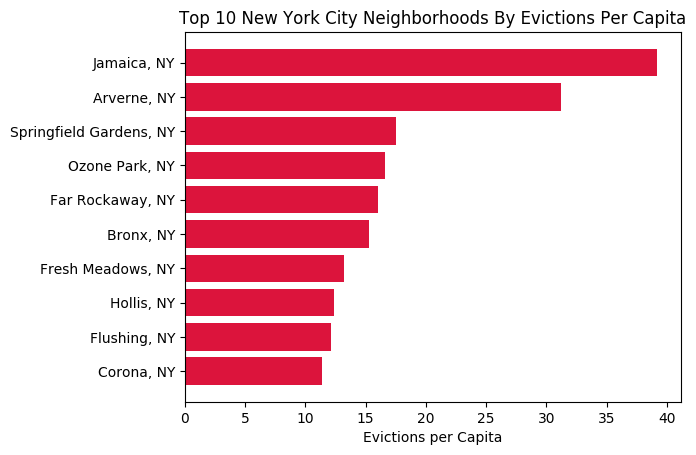

In [174]:
labels=df_city_top10['Neighborhood']

plt.rcdefaults()
fig,ax=plt.subplots()
y_pos=np.arange(len(labels))

ax.barh(y_pos,df_city_top10['Evictions per Capita'],align='center',color='crimson')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Evictions per Capita')
ax.set_title('Top 10 New York City Neighborhoods By Evictions Per Capita')

plt.show()

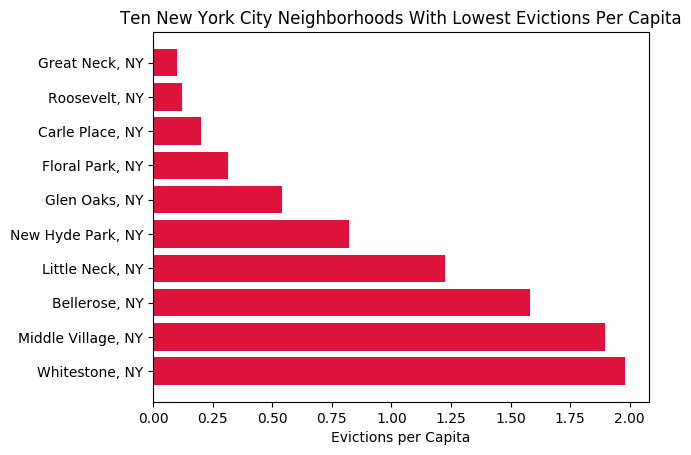

In [175]:
labels=df_city_bottom10['Neighborhood']

plt.rcdefaults()
fig,ax=plt.subplots()
y_pos=np.arange(len(labels))

ax.barh(y_pos,df_city_bottom10['Evictions per Capita'],align='center',color='crimson')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel('Evictions per Capita')
ax.set_title('Ten New York City Neighborhoods With Lowest Evictions Per Capita')

plt.show()